In [1]:
import re
from pymongo import MongoClient
from elasticsearch import Elasticsearch
from habanero import Crossref, counts, cn
import simplejson
import pandas as pd
import matplotlib.pyplot as plt
import random
from matplotlib.ticker import FuncFormatter
import urllib.request
import json

Connecting to MongoDB

In [2]:
client = MongoClient('mongo')
metadatadb = client.get_database('narcis')
metacollection = metadatadb.data

You can connect to local Elasticsearch running on your computer or to DANS remote Elastic service 

In [3]:
es_host = "elasticsnarcis"
es_local = Elasticsearch([es_host])
#es_host = "zandbak21.dans.knaw.nl/search"
es_dans = Elasticsearch([es_host], port=80)
searchindex = 'narcis'
doctype = 'metadata'
es = es_dans
es = es_local

Let's look up for some test record in MongoDB database

In [4]:
ID = 'dhs:oai:nkodata.nl:24'
x = metacollection.find({'id': ID})
for item in x:
    print(item)

{'_id': ObjectId('5ced592895ad4447d4361d09'), 'publisher': ['CentERdata, Tilburg University'], 'description': ['Since 1993, CentERdata annually collects economic data through a panel that consists of some two thousand households. The purpose of this DNB Household Survey (formerly known as CentER Savings Survey) is to study the economic and psychological determinants of the saving behavior of households. The data are collected through the CentERpanel, which collects data every week on various topics.\nNot all Dutch people have computers with Internet access, nor do the panel members. Households without a computer and/or Internet access are given the use of a simple computer and Internet access.'], 'language': [], 'format': [], 'type': [], 'rights': ['Access is limited to registered members', 'info:eu-repo/semantics/openAccess'], 'date': ['2014-05-14'], 'datestamp': '2017-08-30 09:24:43', 'relation': [], 'source': [], 'coverage': [], 'contributor': [], 'title': ['DNB Household Survey (DH

Now search for the record with the same ID in Elasticsearch index

In [5]:
res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'id': "%s" % ID }}})
res['hits']['hits']

[{'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'dhs:oai:nkodata.nl:24',
  '_score': 27.907082,
  '_source': {'publisher': ['CentERdata, Tilburg University'],
   'description': ['Since 1993, CentERdata annually collects economic data through a panel that consists of some two thousand households. The purpose of this DNB Household Survey (formerly known as CentER Savings Survey) is to study the economic and psychological determinants of the saving behavior of households. The data are collected through the CentERpanel, which collects data every week on various topics.\nNot all Dutch people have computers with Internet access, nor do the panel members. Households without a computer and/or Internet access are given the use of a simple computer and Internet access.'],
   'language': [],
   'format': [],
   'type': [],
   'rights': ['Access is limited to registered members',
    'info:eu-repo/semantics/openAccess'],
   'date': ['2014-05-14'],
   'datestamp': '2017-08-30 09:24:43',
   'r

Finally search for the record with affiliation CentERdata in Elasticsearch will find all records where it was mentioned like 'CentERdata', 'CentERdata, Tilburg University', 'Tilburg, CentERdata' etc.

In [6]:
publisher = 'CentERdata'
res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'publisher': "%s" % publisher }}})
res['hits']['hits']

[{'_index': 'narcis',
  '_type': 'metadata',
  '_id': 'cdata:oai:lissdata.nl:54',
  '_score': 10.83231,
  '_source': {'publisher': ['CentERdata'],
   'description': ['In this study, we focus on factors underlying the concept of well-being, in particular the extent to which well-being is affected by social comparison processes. Previous studies have looked at how well-being can be predicted by people’s relative position, for instance with respect to income or health, within an objectively defined population distribution. It may be that people’s well-being might be better predicted by the subjective, rather than by the objective distributions of properties such as income or health. We intend to investigate this.'],
   'language': [],
   'format': [],
   'type': [],
   'rights': ['2009 CentERdata', 'info:eu-repo/semantics/openAccess'],
   'date': [],
   'datestamp': '2019-02-21 00:05:50',
   'relation': [],
   'source': [],
   'coverage': [],
   'contributor': [],
   'title': ['Effect of 

Let's investigate records with DOI

In [7]:
identifier = 'doi'
res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'identifier': "%s" % identifier }}})
print("Count of records with DOI %s" % str(res['hits']['total']))
res['hits']['hits']

Count of records with DOI 98962


[{'_index': 'narcis',
  '_type': 'metadata',
  '_id': '4tu:collection:strains',
  '_score': 4.5713186,
  '_source': {'publisher': ['4TU.Centre for Research Data'],
   'description': ['The Strains (STRAtification Impacts Near-shore Sediment ) project was initiated by Julie Pietrzak (TUD), Alex Souza (then NOC,  now at CINVESTAV), and Alex Horner-Devine (UW) in order to gain a better understanding  of the impact of stratification, due to the Rhine River outflow, on sediment transport processes along the Dutch coast. The impact of the stratification due to the Rhine ROFI is key within this project. It is a joint-project between different institutions, Delft University of Technology, University of Washington, NOC, and CINVESTAV. Two measurement campaigns have been carried out as part of STRAINS, one was in winter 2013 (11/02 - 08/03) and one in autumn 2014 (17/09 -  28/10). Each campaign involved the deployment of two moorings and two or three frames located 2 and 6.5 km from the shoreline

Connecting to Crossref and lookup for some keyword

In [8]:
cr = Crossref()
x = cr.works(query = "archaelogy")
x['message']

{'facets': {},
 'total-results': 57,
 'items': [{'indexed': {'date-parts': [[2019, 2, 15]],
    'date-time': '2019-02-15T08:03:25Z',
    'timestamp': 1550217805075},
   'reference-count': 0,
   'publisher': 'IEEE',
   'content-domain': {'domain': [], 'crossmark-restriction': False},
   'DOI': '10.1109/oceans.1989.592842',
   'type': 'proceedings-article',
   'created': {'date-parts': [[2005, 8, 24]],
    'date-time': '2005-08-24T20:29:31Z',
    'timestamp': 1124915371000},
   'source': 'Crossref',
   'is-referenced-by-count': 0,
   'title': ['The future of marine archaelogy lies in deep water'],
   'prefix': '10.1109',
   'author': [{'given': 'R.F.',
     'family': 'Marx',
     'sequence': 'first',
     'affiliation': []}],
   'member': '263',
   'event': {'name': 'OCEANS', 'location': 'Seattle, WA'},
   'container-title': ['Proceedings OCEANS'],
   'link': [{'URL': 'http://xplorestaging.ieee.org/ielx2/4490/12734/00592842.pdf?arnumber=592842',
     'content-type': 'unspecified',
     '

Count of citations for the publication with specific DOI

In [9]:
counts.citation_count(doi = "10.1016/j.fbr.2012.01.001")

142

Citations count for DOI from NARCIS

In [10]:
narcisdoi = "10.17632/xf4d9vmkvb.1"
counts.citation_count(doi = narcisdoi)

0

Metadata description for the NARCIS record in Crossref

In [11]:
narcisdoi = '10.17026/dans-xpk-wj5w'
cn.content_negotiation(ids = narcisdoi)

'@misc{https://doi.org/10.17026/dans-xpk-wj5w,\n  doi = {10.17026/DANS-XPK-WJ5W},\n  url = {https://easy.dans.knaw.nl/ui/datasets/id/easy-dataset:65225},\n  author = {Meroño Peñuela, A. and Ashkpour, A. and Guéret, C.},\n  keywords = {Humanities, History, Social sciences, Computer science, RDF, Linked Data, semantic web, Historische Volkstellingen, Census Data, historical censuses, dutch history, Temporal coverage: 1795-1971},\n  language = {nl},\n  title = {CEDAR RDF database, the Dutch historical censuses (1795-1971) as Linked Open Data},\n  publisher = {Data Archiving and Networked Services (DANS)},\n  year = {2016}\n}\n'

In [12]:
def altmetrics(apiurl):
    jsoncontent = urllib.request.urlopen(apiurl)
    content = jsoncontent.read()
    return json.loads(content)

Records count overview for the decade

In [13]:
overview = {}
for year in range(2014, 2020):
    res = es.search(index=searchindex, doc_type=doctype, body={"query": {"match": {'date': "%s" % year }}})
    overview[year] = res['hits']['total']
overview

{2014: 69188, 2015: 65891, 2016: 55524, 2017: 50926, 2018: 45244, 2019: 11441}

In [14]:
subset = {}
known = {}
subsize = 10
yearids = {}
secure_random = random.SystemRandom()
for year in range(2000, 2010):
    ids = []
    res = es.search(index=searchindex, doc_type=doctype, size=10000, body={"query": {"match": {'date': "%s" % year }}})
    subset[year] = res['hits']['total']
    for record in res['hits']['hits']:
        ids.append(record['_id'])
    yearids[year] = ids

randset = {}
for year in yearids:
    yearrand = []
    selected = 0
    pointer = 0
    while selected < subsize:
        r = random.choice(ids)
        if not r in known:
            known[r] = r
            yearrand.append(r)
            selected = selected + 1
    randset[year] = yearrand

{2000: ['uvapub:oai:dare.uva.nl:publications/bcf4cb76-9c51-4975-9195-4fc5991a7d43',
  'ul:oai:openaccess.leidenuniv.nl:1887/14686',
  'uvapub:oai:dare.uva.nl:publications/0c3d620a-58a7-4c88-9636-6a8743761215',
  'uvt:oai:tilburguniversity.edu:publications/5f2914ca-e7c6-45f1-a698-77b22372083e',
  'ru:oai:repository.ubn.ru.nl:2066/78481',
  'wur:oai:library.wur.nl:wurpubs/372297',
  'rug:oai:pure.rug.nl:publications/536f491c-9735-411c-acbf-7b850aaa7f3c',
  'rug:oai:pure.rug.nl:publications/eda1d088-aefc-4aba-b161-e68b0c77be80',
  'ru:oai:repository.ubn.ru.nl:2066/80154',
  'uvapub:oai:dare.uva.nl:publications/748eb894-2938-4849-a0bd-e561ff4afd94'],
 2001: ['rug:oai:pure.rug.nl:publications/a1517e45-8096-48d7-bf5a-7328885ac960',
  'tue:oai:pure.tue.nl:publications/ef36a869-527b-4f3e-947a-bd35c1c4b4e8',
  'rce:document:550039567',
  'ru:oai:repository.ubn.ru.nl:2066/86414',
  'knaw:oai:pure.knaw.nl:publications/71573bbe-84b7-404c-949f-bac6f146c3b3',
  'rce-kb:document:800007087',
  'rce-kb

In [21]:
#doi/10.1007/s00411-007-0096-1
for doiurl in randset[2000]:
    print(doiurl)
    try:
        print(altmetrics(doiurl))
    except:
        print("%s not found" % doiurl)

uvapub:oai:dare.uva.nl:publications/bcf4cb76-9c51-4975-9195-4fc5991a7d43
uvapub:oai:dare.uva.nl:publications/bcf4cb76-9c51-4975-9195-4fc5991a7d43 not found
ul:oai:openaccess.leidenuniv.nl:1887/14686
ul:oai:openaccess.leidenuniv.nl:1887/14686 not found
uvapub:oai:dare.uva.nl:publications/0c3d620a-58a7-4c88-9636-6a8743761215
uvapub:oai:dare.uva.nl:publications/0c3d620a-58a7-4c88-9636-6a8743761215 not found
uvt:oai:tilburguniversity.edu:publications/5f2914ca-e7c6-45f1-a698-77b22372083e
uvt:oai:tilburguniversity.edu:publications/5f2914ca-e7c6-45f1-a698-77b22372083e not found
ru:oai:repository.ubn.ru.nl:2066/78481
ru:oai:repository.ubn.ru.nl:2066/78481 not found
wur:oai:library.wur.nl:wurpubs/372297
wur:oai:library.wur.nl:wurpubs/372297 not found
rug:oai:pure.rug.nl:publications/536f491c-9735-411c-acbf-7b850aaa7f3c
rug:oai:pure.rug.nl:publications/536f491c-9735-411c-acbf-7b850aaa7f3c not found
rug:oai:pure.rug.nl:publications/eda1d088-aefc-4aba-b161-e68b0c77be80
rug:oai:pure.rug.nl:publicat

In [15]:
%matplotlib inline
data = pd.DataFrame(overview.items(), columns=['Date', 'DateValue'])
subset

{2000: 39584,
 2001: 41693,
 2002: 44150,
 2003: 47189,
 2004: 53364,
 2005: 55341,
 2006: 56675,
 2007: 59781,
 2008: 65191,
 2009: 68380}

In [16]:
apiurl = 'http://api.altmetric.com/v1/doi/10.1007/s00411-007-0096-1'
print(altmetrics(apiurl))

{'title': 'UVB induced oxidative stress in human keratinocytes and protective effect of antioxidant agents', 'doi': '10.1007/s00411-007-0096-1', 'pmid': '17279358', 'altmetric_jid': '4f6fa6063cf058f610006708', 'issns': ['0301-634X', '1432-2099'], 'journal': 'Radiation & Environmental Biophysics', 'cohorts': [], 'context': {'all': {'count': 13610796, 'mean': 8.1551153587908, 'rank': 1531581, 'pct': 88, 'higher_than': 12025846}, 'journal': {'count': 355, 'mean': 4.1406892655367, 'rank': 17, 'pct': 94, 'higher_than': 337}, 'similar_age_3m': {'count': 147702, 'mean': 11.565969492421, 'rank': 24858, 'pct': 82, 'higher_than': 122475}, 'similar_age_journal_3m': {'count': 5, 'mean': 2.05, 'rank': 1, 'pct': 80, 'higher_than': 4}}, 'authors': ['Guang-Hui Jin', 'Yang Liu', 'Shun-Zi Jin', 'Xiao-Dong Liu', 'Shu-Zheng Liu'], 'type': 'article', 'altmetric_id': 67478726, 'schema': '1.5.4', 'is_oa': False, 'publisher_subjects': [{'name': 'Biological Sciences', 'scheme': 'era'}, {'name': 'Biological and

No handles with labels found to put in legend.


Text(0.5, 1.0, 'NARCIS records overview, by years: ')

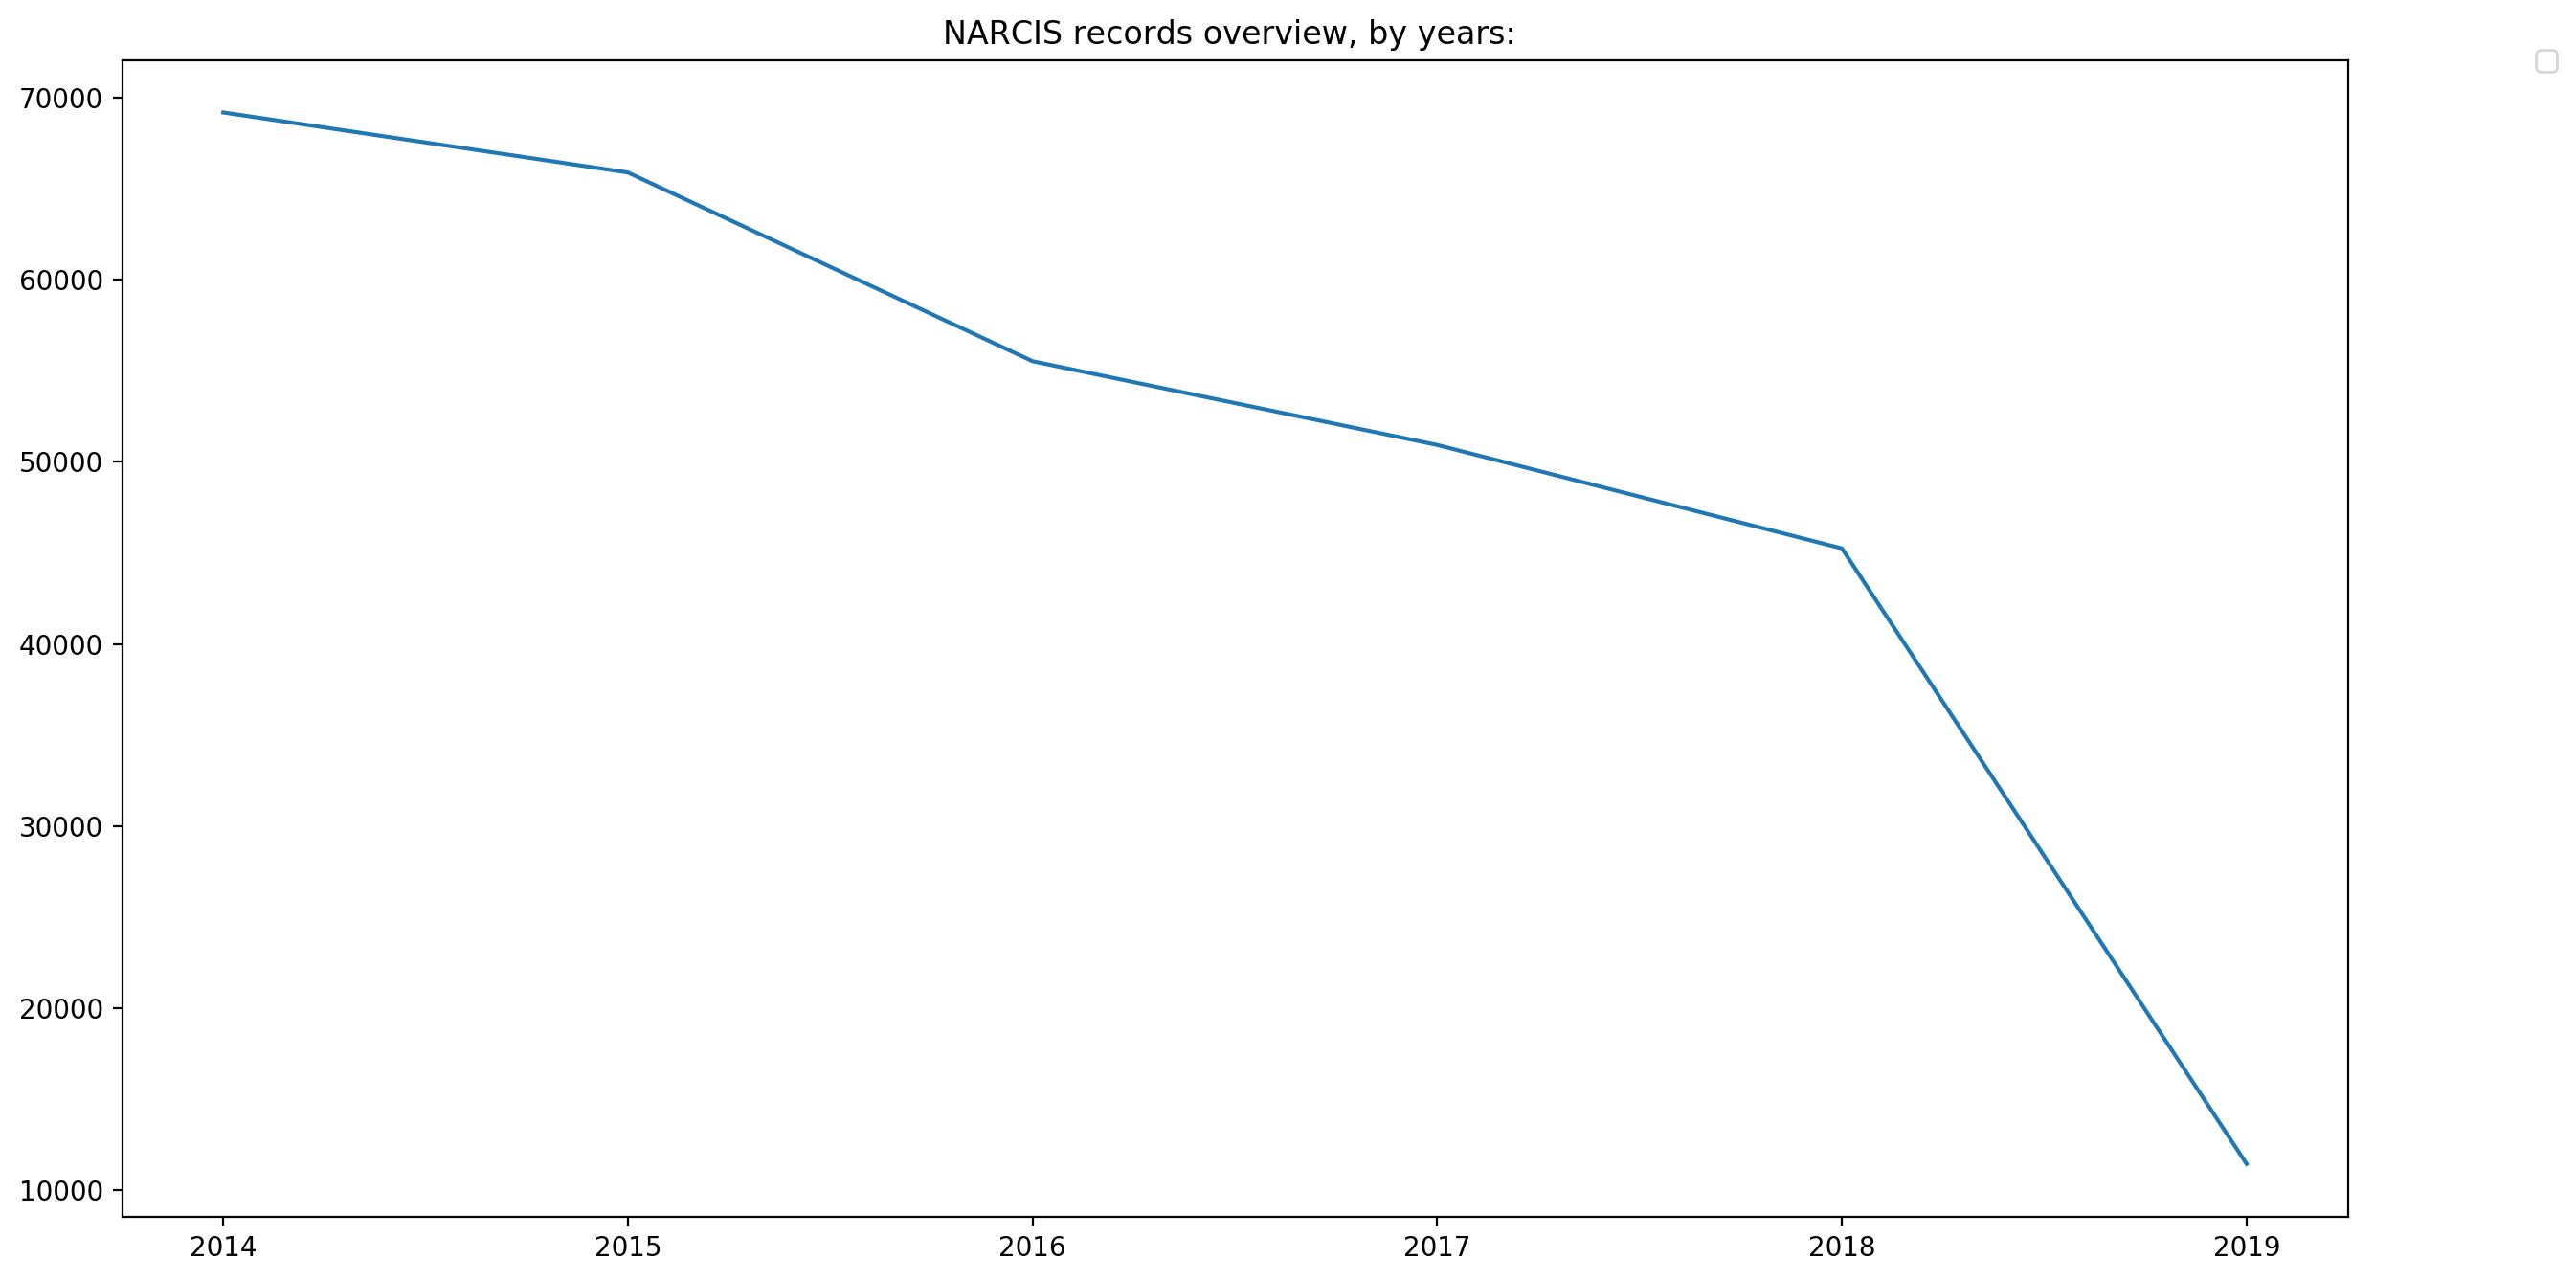

In [17]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=200)
ax.plot(data['Date'], data['DateValue'])
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.02))
plt.title('NARCIS records overview, by years: ')